<a href="https://colab.research.google.com/github/KhripkovaNA/Laptop_prices_app/blob/main/laptop_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flipkart Laptop Data - Business Insights on Product Pricing
**Problem Statement**

Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.
He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things. 
Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS,  etc) and its selling price. But he is not so good at Data Mining.
To solve this problem he already asked his Data Engineering team (from Twitter) to collect laptop data from various competitors.



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

laptop_csv = '/content/drive/MyDrive/laptop_details.csv'
df = pd.read_csv(laptop_csv)
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [3]:
print(*df['Product'].sample(1).values)

Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 GB/512 GB SSD/Windows 11 Home) 15ADA7 Thin and Light Lap...


In [4]:
print(*df['Feature'].sample(1).values)

Intel Celeron Quad Core Processor8 GB LPDDR4X RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) Display1 Year Onsite Warranty


In [5]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)
df['MRP'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

In [6]:
def find_feature(regex, row):
  row_match = re.findall(regex, row)
  if re.search(regex, row) is None:
    return np.nan
  else:
    return ' '.join(row_match)

count               719
unique               25
top       Intel Core i5
freq                157
Name: Processor, dtype: object
Intel Core i5                      157
Intel Core i3                      133
AMD Ryzen 9 Octa Core               87
AMD Ryzen 7 Octa Core               80
Intel Core i7                       56
AMD Ryzen 5 Hexa Core               52
AMD Ryzen 3 Dual Core               43
AMD Ryzen 5 Quad Core               37
Intel Celeron Dual Core             20
Intel Core i9                       11
Apple M1                             7
Apple M1 Pro                         6
Apple M2                             5
AMD Ryzen 3 Quad Core                4
Intel Pentium Silver                 3
Intel Celeron Quad Core              3
Intel Pentium Quad Core              3
AMD Ryzen 5 Dual Core                2
Intel Evo Core i5 Intel Core i5      2
AMD Athlon Dual Core                 2
Intel OptaneIntel Core i3            2
Apple M1 Max                         1
AMD Ryzen 7 Qua

<Axes: >

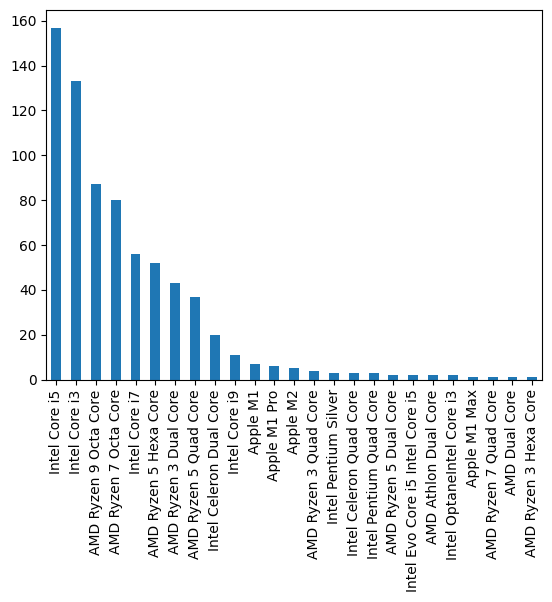

In [7]:
# Processor Information
regex = r'((?:AMD|Intel|Apple M1|Apple M2)[\s\w]*)\sProcessor'
df['Processor'] = df['Feature'].apply(lambda x : find_feature(regex, x))
print(df['Processor'].describe())
print(df['Processor'].value_counts())
df['Processor'].value_counts().plot(kind='bar')

In [8]:
print(*df[df['Processor'].isnull()]['Feature'])

Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty


In [9]:
df['Processor'].fillna('Intel', inplace=True)

In [10]:
conditions = [df['Processor'].str.contains('Intel'),
              df['Processor'].str.contains('AMD'),
              df['Processor'].str.contains('Apple')]
cpu_types = ['Intel', 'AMD', 'Apple']
df['CPU_type'] = np.select(conditions, cpu_types, default='Other')
df['CPU_type'].value_counts()

Intel    391
AMD      310
Apple     19
Name: CPU_type, dtype: int64

In [11]:
conditions = [df['Processor'].str.contains('Dual|i3'),
              df['Processor'].str.contains('Quad|i5'),
              df['Processor'].str.contains('Hexa|i7|i9'), 
              df['Processor'].str.contains('Octa|M1$|M1 Pro'), 
              df['Processor'].str.contains('M2|M1 Max')]
cpu_cores = [2, 4, 6, 8, 10]
df['CPU_cores'] = np.select(conditions, cpu_cores, default=np.nan)
df['CPU_cores'].fillna(df['CPU_cores'].median(), inplace=True)
df['CPU_cores'].describe()

count    720.000000
mean       4.819444
std        2.330343
min        2.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       10.000000
Name: CPU_cores, dtype: float64

In [12]:
regex = r'(\d+\sGB[\s\w]+)\sRAM'
df['RAM'] = df['Feature'].apply(lambda x : find_feature(regex, x))
df['RAM'].value_counts()

8 GB DDR4                                                                                          377
16 GB DDR4                                                                                         153
16 GB DDR5                                                                                          77
4 GB DDR4                                                                                           26
8 GB LPDDR4X                                                                                        16
16 GB LPDDR4X                                                                                       16
32 GB DDR5                                                                                          11
16 GB LPDDR5                                                                                         9
4 GB LPDDR4                                                                                          7
16 GB Unified Memory                                                     

In [13]:
df[df['RAM'] == '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and 8 GB DDR4'].index

Int64Index([438], dtype='int64')

count           720
unique           18
top       8 GB DDR4
freq            378
Name: RAM, dtype: object
8 GB DDR4               378
16 GB DDR4              153
16 GB DDR5               77
4 GB DDR4                26
8 GB LPDDR4X             16
16 GB LPDDR4X            16
32 GB DDR5               11
16 GB LPDDR5              9
4 GB LPDDR4               7
16 GB Unified Memory      6
8 GB Unified Memory       5
4 GB LPDDR4X              4
8 GB DDR5                 4
32 GB DDR4                4
32 GB Unified Memory      1
16 GB LPDDR4              1
32 GB LPDDR4X             1
16 GB LPDDR3              1
Name: RAM, dtype: int64


<ipython-input-14-5f8773bcdca5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RAM'][438] = re.findall(regex, df['Feature'][438])[1]


<Axes: >

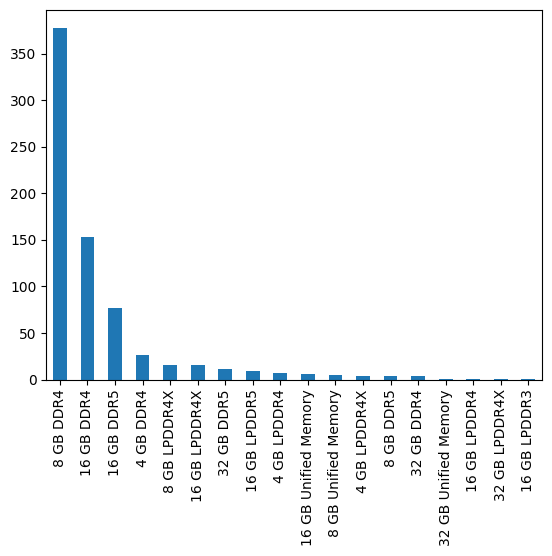

In [14]:
regex = r'(\d+\sGB[\s\w]+)\sRAM'
df['RAM'][438] = re.findall(regex, df['Feature'][438])[1]
print(df['RAM'].describe())
print(df['RAM'].value_counts())
df['RAM'].value_counts().plot(kind='bar')

In [15]:
df['RAM_size'] = df['RAM'].apply(lambda x: int(re.search(r'(\d+)\sGB', x).group(1)))
df['RAM_size'].describe()

count    720.000000
mean      11.283333
std        5.201663
min        4.000000
25%        8.000000
50%        8.000000
75%       16.000000
max       32.000000
Name: RAM_size, dtype: float64

In [16]:
df['RAM_type'] = df['RAM'].apply(lambda x: re.search(r'GB\s([\w\s]+)', x).group(1))
df['RAM_type'].value_counts()

DDR4              561
DDR5               92
LPDDR4X            37
Unified Memory     12
LPDDR5              9
LPDDR4              8
LPDDR3              1
Name: RAM_type, dtype: int64

In [17]:
df['RAM_type'] = df['RAM_type'].apply(lambda x: re.search(r'DDR(3|4|5)|Unified Memory', x).group(0))
df['RAM_type'].value_counts()

DDR4              606
DDR5              101
Unified Memory     12
DDR3                1
Name: RAM_type, dtype: int64

In [18]:
df['RAM_type'].replace({'DDR3': 'DDR4'}, inplace=True)
df['RAM_type'].value_counts()

DDR4              607
DDR5              101
Unified Memory     12
Name: RAM_type, dtype: int64

In [19]:
ram_types = ['DDR4', 'DDR5', 'LPDDR4X', 'Unified Memory', 'LPDDR5', 'LPDDR4', 'LPDDR3', 'Other']
for ram_type in ram_types:
  if re.search('DDR[3|4]', ram_type):
    ram_type = 'DDR4'
  elif re.search('DDR5', ram_type):
    ram_type = 'DDR5'
  print(ram_type)

DDR4
DDR5
DDR4
Unified Memory
DDR5
DDR4
DDR4
Other


In [20]:
# OS 

regex = r'([\d]+[\s]bit[\s\w]+|Windows\s[\d]+|Mac\sOS|DOS|Chrome)\sOperating System'
df['OS'] = df['Feature'].apply(lambda x : find_feature(regex, x))
df['OS'].value_counts()

64 bit Windows 11               404
Windows 11                      156
64 bit Windows 10               116
Mac OS                           19
Windows 10                       12
Chrome                            6
DOS                               2
64 bit DOS                        2
32 bit Windows 11                 1
Windows 10 64 bit Windows 10      1
64 bit Chrome                     1
Name: OS, dtype: int64

In [21]:
df['OS'] = df['OS'].apply(lambda x: re.search(r'Windows|Mac OS|Chrome|DOS', x).group(0))
df['OS'].value_counts()

Windows    690
Mac OS      19
Chrome       7
DOS          4
Name: OS, dtype: int64

In [22]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD|EMMC)'
df['Storage'] = df['Product'].apply(lambda x : find_feature(regex, x))
df['Storage'].value_counts()

512 GB SSD               375
1 TB SSD                 176
256 GB SSD                98
1 TB HDD 256 GB SSD       26
1 TB HDD                  17
64 GB EMMC                 7
2 TB SSD                   7
128 GB SSD                 6
128 GB EMMC                2
1 TB HDD 512 GB SSD        2
1 TB HDD 128 GB SSD        2
256 GB HDD 256 GB SSD      1
32 GB EMMC                 1
Name: Storage, dtype: int64

In [23]:
regex_SSD = r'(\d+\s(?:GB|TB))\sSSD'
regex_HDD = r'(\d+\s(?:GB|TB))\sHDD'
regex_EMMC = r'(\d+\s(?:GB|TB))\sEMMC'

HDD_size = []
SSD_size = []
EMMC_size = []
HDD = []
SSD = []
EMMC = []

for row in df['Storage']:
  if 'HDD' in row:
    size = int(re.search(r'(\d+)\s(?:GB|TB)\sHDD', row).group(1))
    hdd = size if re.search(r'GB\sHDD', row) else size * 1000
    HDD_size.append(hdd)
    HDD.append(1)
  else:
    HDD_size.append(0)
    HDD.append(0)
  if 'SSD' in row:
    size = int(re.search(r'(\d+)\s(?:GB|TB)\sSSD', row).group(1))
    ssd = size if re.search(r'GB\sSSD', row) else size * 1000
    SSD_size.append(ssd)
    SSD.append(1)
  else:
    SSD_size.append(0)
    SSD.append(0)
  if 'EMMC' in row:
    size = int(re.search(r'(\d+)\sGB\sEMMC', row).group(1))
    EMMC_size.append(size)
    EMMC.append(1)
  else:
    EMMC_size.append(0)
    EMMC.append(0)

df['HDD_size'] = HDD_size
df['HDD'] = HDD
df['SSD_size'] = SSD_size
df['SSD'] = SSD
df['EMMC_size'] = EMMC_size
df['EMMC'] = EMMC
df[['HDD_size', 'SSD_size', 'EMMC_size']].describe()

,HDD_size,SSD_size,EMMC_size
count,720.000000,720.000000,720.000000
mean,65.633333,577.844444,1.022222
std,247.277153,313.667202,9.264439
min,0.000000,0.000000,0.000000
25%,0.000000,512.000000,0.000000
50%,0.000000,512.000000,0.000000
75%,0.000000,1000.000000,0.000000
max,1000.000000,2000.000000,128.000000


In [24]:
df['Drive_size'] = df[['HDD_size', 'SSD_size', 'EMMC_size']].sum(axis=1)
df['Drive_size'].describe()

count     720.000000
mean      644.500000
std       323.421925
min        32.000000
25%       512.000000
50%       512.000000
75%      1000.000000
max      2000.000000
Name: Drive_size, dtype: float64

In [25]:
conditions = [df['Storage'].str.contains('HDD') & df['Storage'].str.contains('SSD'), 
              df['Storage'].str.contains('HDD') & (df['Storage'].str.contains('SSD') == False), 
              df['Storage'].str.contains('SSD') & (df['Storage'].str.contains('HDD') == False), 
              df['Storage'].str.contains('EMMC')]
drive_types = ['HDD & SSD', 'HDD', 'SSD', 'EMMC']
df['Drive_type'] = np.select(conditions, drive_types)
df['Drive_type'].value_counts()

SSD          662
HDD & SSD     31
HDD           17
EMMC          10
Name: Drive_type, dtype: int64

In [26]:
# Display

regex = r'\(([\d]+\.?[\d]*)\s(?:Inch|inch|inches)\)'
df['Display'] = df['Feature'].apply(lambda x : float(find_feature(regex, x)))
df['Display'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 720 entries, 0 to 719
Series name: Display
Non-Null Count  Dtype  
--------------  -----  
718 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [27]:
print(df[df['Display'].isnull()]['Feature'].values)

['Processor: AMD Ryzen 3-3250U (2.60 GHz up to 3.50 GHz)RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 1TB HDDSoftware: Win 11 + Office H&S 2021Display: 14.0" FHD WVA AG Narrow BorderPorts: USB 3.2 Gen 1 (x2), USB2.0 (x1), HDMI 1.4, SD Media Card Reader (SD, SDHC, SDXC), RJ45 - 10/100MbpsWiFi & BT: 802.11ac 1x1 WiFi and BluetoothAMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System1 TB HDD88.9 cm (35 cm) DisplayMicrosoft Office Home and Student 20211 Year Onsite Warranty1 Year Onsite Warranty'
 'Processor: 11th Generation Intel Core i5-1135G7 Processor (8MB Cache, up to 4.2 GHz),Memory & Storage:8GB DDR4, 2666MHz | 512GB M.2 PCIe NVMe Solid State DriveDisplay:14.0-inch FHD (1920 x 1080) Anti-glare LED Backlight Narrow Border WVA DisplayGraphics: Dedicated NVIDIA MX330 2GB GDDR5Operating System & Software:Windows 10 Home Single Language | Microsoft Office Home and Student 2019I/O ports: 2x USB 3.2 Gen-1, 1xUSB 2.0, 1xHDMI port, 1xEthernet port,1x Headset jack, 1xSD Me

In [28]:
df['Display'].fillna(14, inplace=True)
df['Display'].describe()

count    720.000000
mean      15.183000
std        0.891272
min       11.600000
25%       14.175000
50%       15.600000
75%       15.600000
max       17.300000
Name: Display, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float64
 3   Feature     720 non-null    object 
 4   Processor   720 non-null    object 
 5   CPU_type    720 non-null    object 
 6   CPU_cores   720 non-null    float64
 7   RAM         720 non-null    object 
 8   RAM_size    720 non-null    int64  
 9   RAM_type    720 non-null    object 
 10  OS          720 non-null    object 
 11  Storage     720 non-null    object 
 12  HDD_size    720 non-null    int64  
 13  HDD         720 non-null    int64  
 14  SSD_size    720 non-null    int64  
 15  SSD         720 non-null    int64  
 16  EMMC_size   720 non-null    int64  
 17  EMMC        720 non-null    int64  
 18  Drive_size  720 non-null    int64  
 19  Drive_type  720 non-null    o

In [30]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Processor', 'CPU_type',
       'CPU_cores', 'RAM', 'RAM_size', 'RAM_type', 'OS', 'Storage', 'HDD_size',
       'HDD', 'SSD_size', 'SSD', 'EMMC_size', 'EMMC', 'Drive_size',
       'Drive_type', 'Display'],
      dtype='object')

In [31]:
df.isnull().sum()

Product         0
Rating        139
MRP             0
Feature         0
Processor       0
CPU_type        0
CPU_cores       0
RAM             0
RAM_size        0
RAM_type        0
OS              0
Storage         0
HDD_size        0
HDD             0
SSD_size        0
SSD             0
EMMC_size       0
EMMC            0
Drive_size      0
Drive_type      0
Display         0
dtype: int64

In [32]:
data = df[['CPU_type', 'CPU_cores', 'OS', 'Display', 'RAM_size', 'RAM_type', 'HDD_size', 'HDD', 'SSD_size', 'SSD', 'EMMC_size', 'EMMC', 'Drive_size', 'Drive_type', 'MRP']]
data = data.dropna(subset=['CPU_type', 'Drive_type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CPU_type    720 non-null    object 
 1   CPU_cores   720 non-null    float64
 2   OS          720 non-null    object 
 3   Display     720 non-null    float64
 4   RAM_size    720 non-null    int64  
 5   RAM_type    720 non-null    object 
 6   HDD_size    720 non-null    int64  
 7   HDD         720 non-null    int64  
 8   SSD_size    720 non-null    int64  
 9   SSD         720 non-null    int64  
 10  EMMC_size   720 non-null    int64  
 11  EMMC        720 non-null    int64  
 12  Drive_size  720 non-null    int64  
 13  Drive_type  720 non-null    object 
 14  MRP         720 non-null    float64
dtypes: float64(3), int64(8), object(4)
memory usage: 84.5+ KB


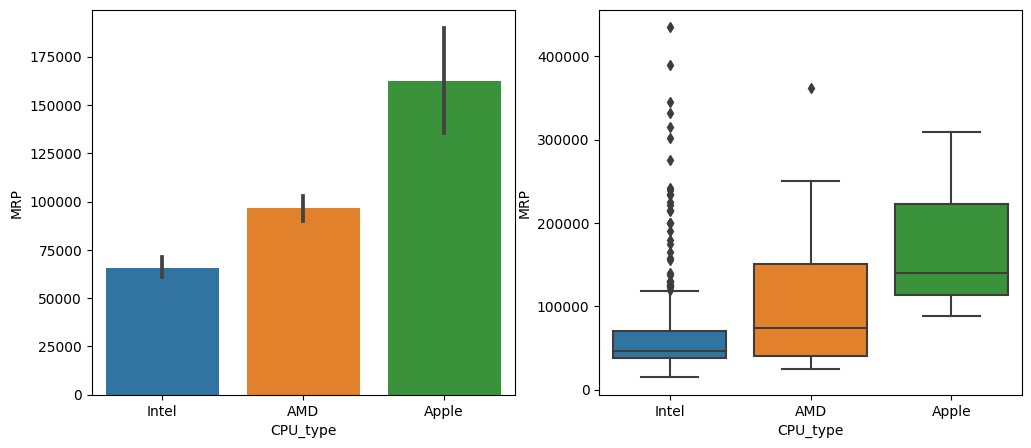

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=data, x='CPU_type', y='MRP', ax=axes[0])
sns.boxplot(data=data, x='CPU_type', y='MRP', ax=axes[1])
plt.show()

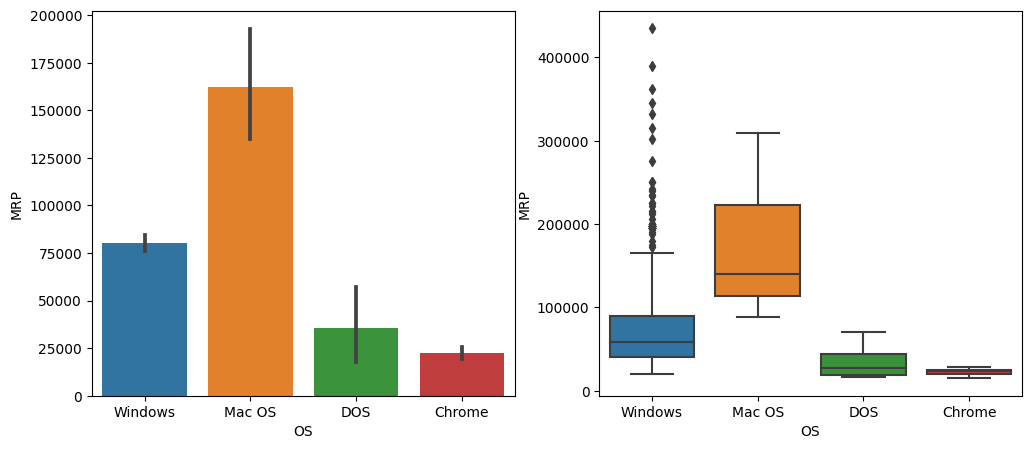

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=data, x='OS', y='MRP', ax=axes[0])
sns.boxplot(data=data, x='OS', y='MRP', ax=axes[1])
plt.show()

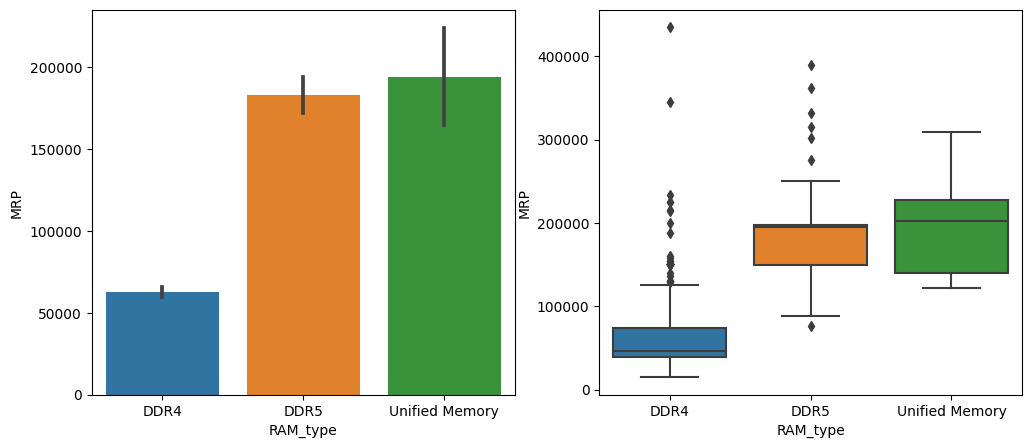

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=data, x='RAM_type', y='MRP', ax=axes[0])
sns.boxplot(data=data, x='RAM_type', y='MRP', ax=axes[1])
plt.show()

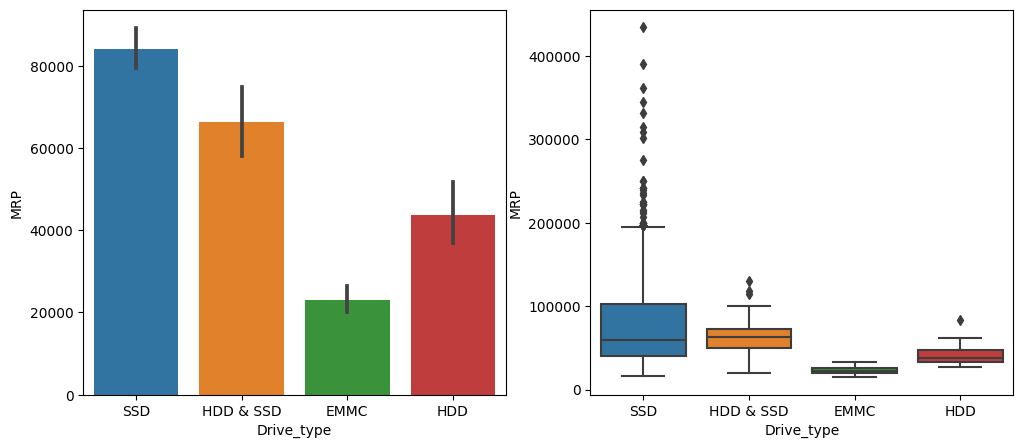

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=data, x='Drive_type', y='MRP', ax=axes[0])
sns.boxplot(data=data, x='Drive_type', y='MRP', ax=axes[1])
plt.show()

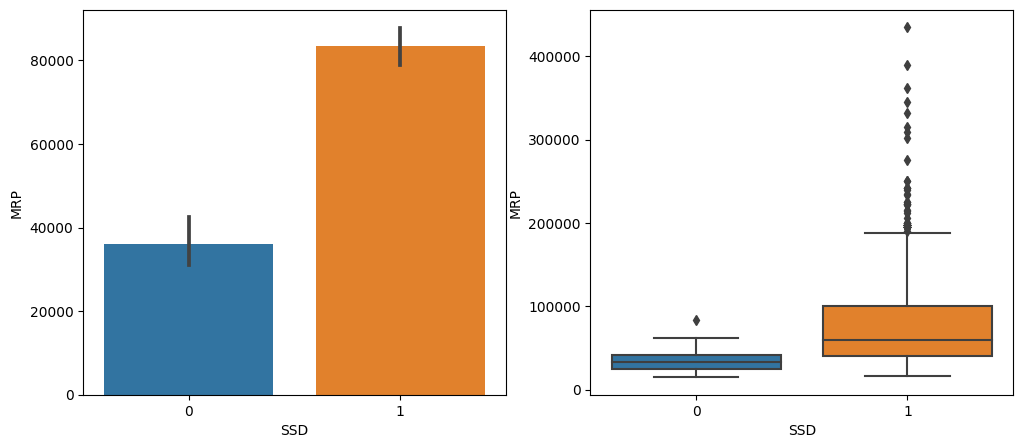

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=data, x='SSD', y='MRP', ax=axes[0])
sns.boxplot(data=data, x='SSD', y='MRP', ax=axes[1])
plt.show()

<Axes: >

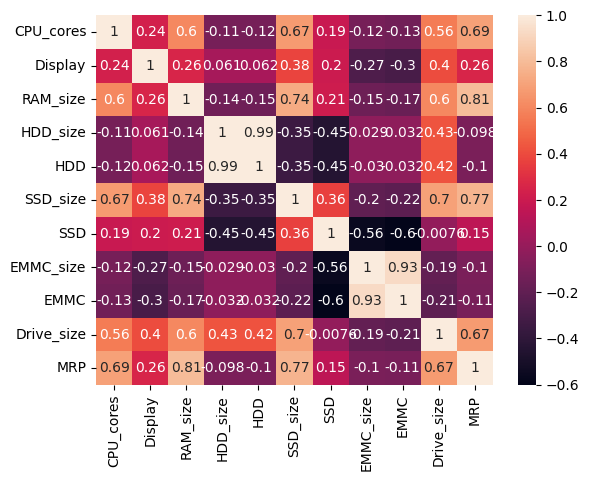

In [38]:
sns.heatmap(data.corr(), annot=True)

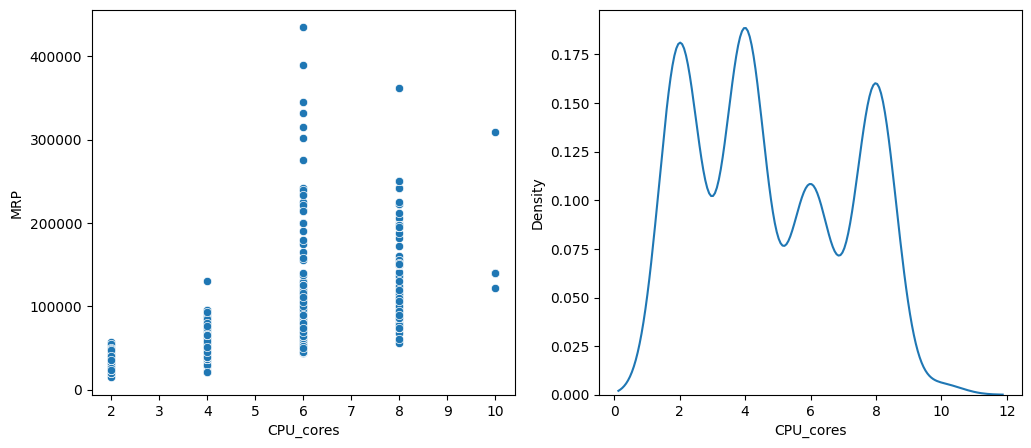

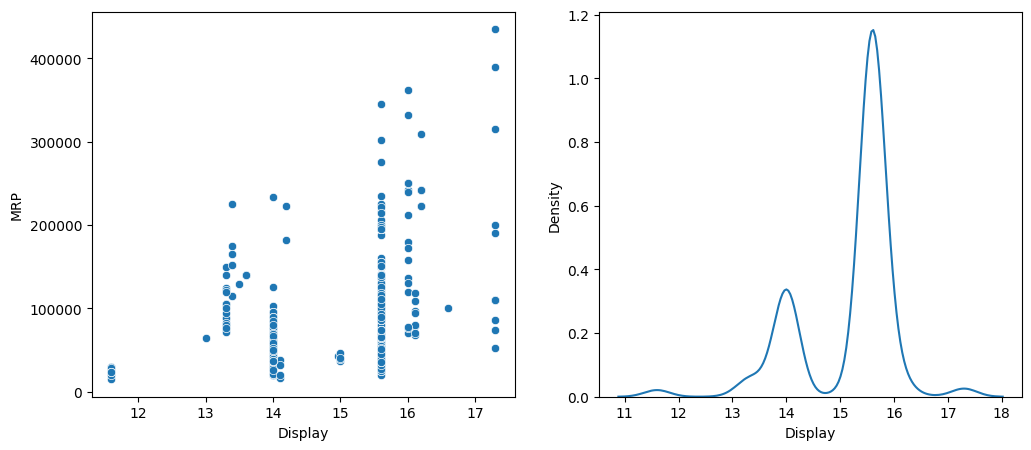

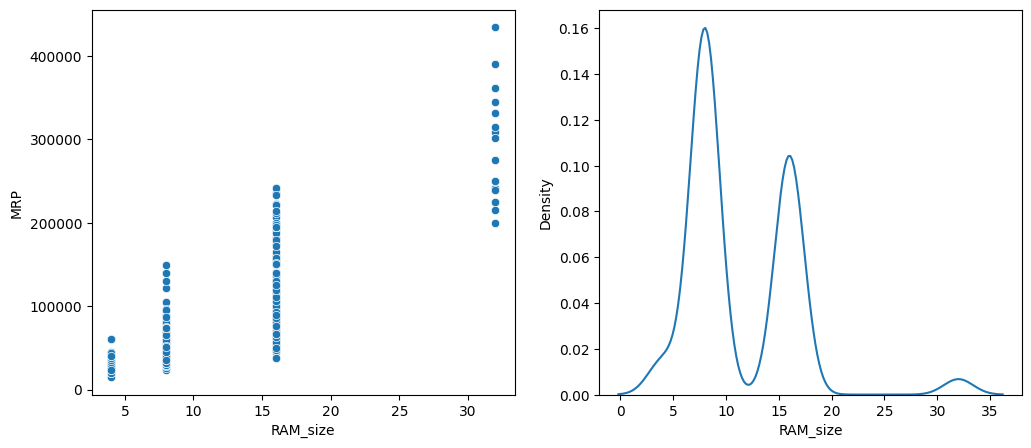

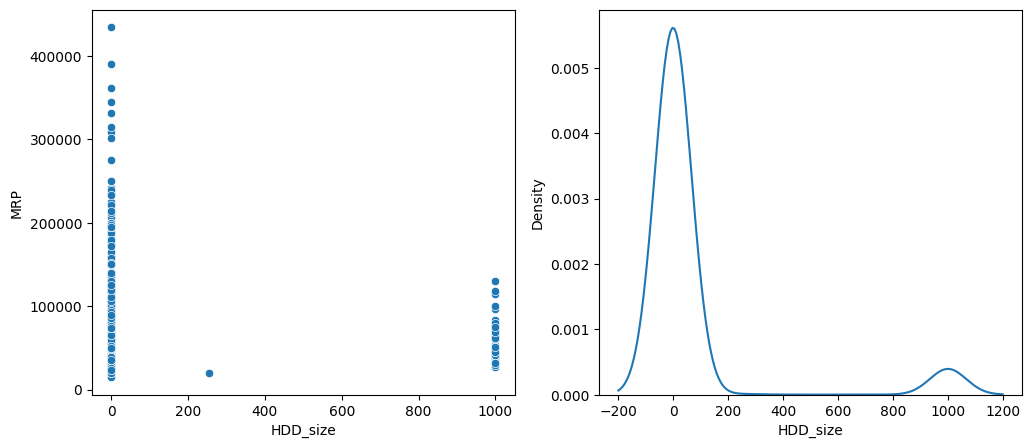

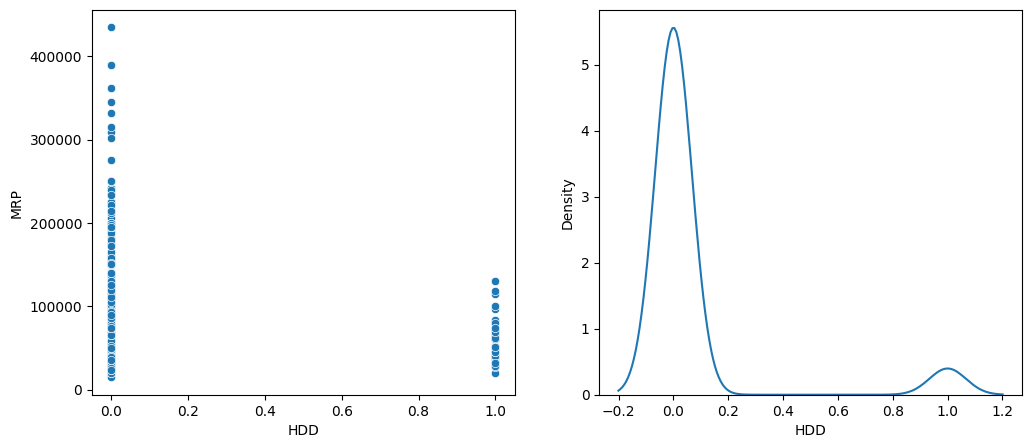

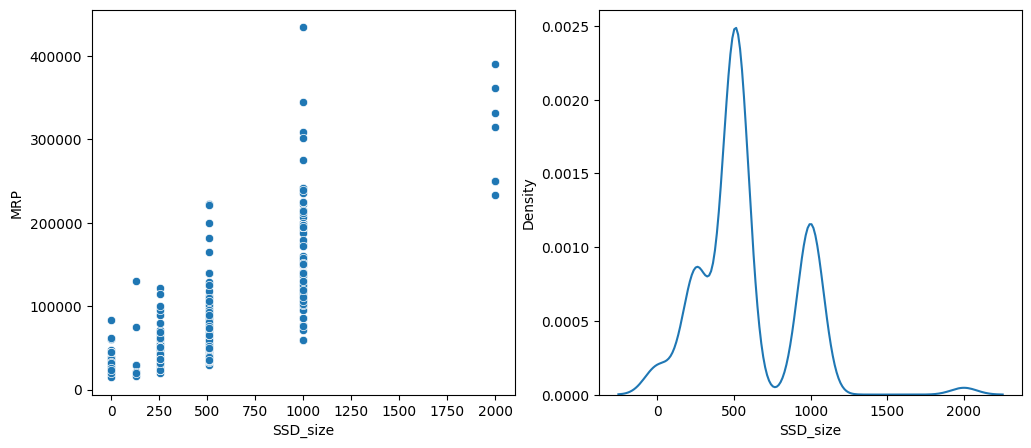

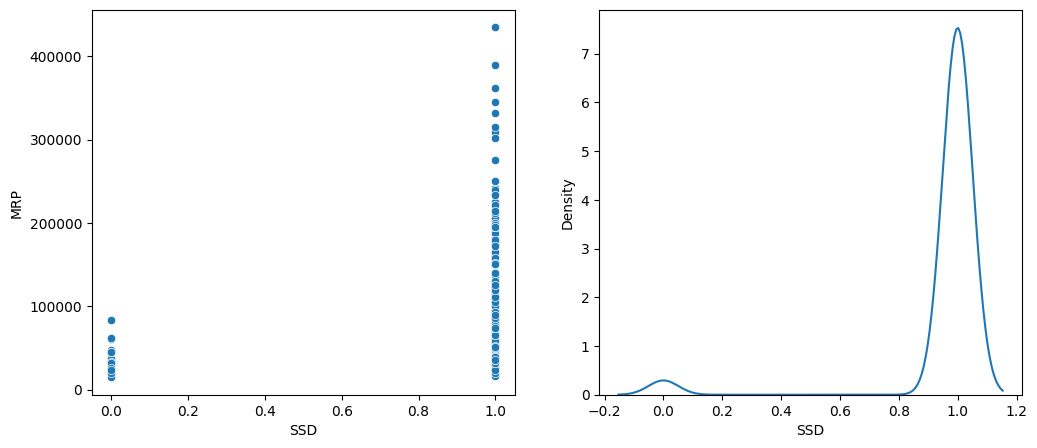

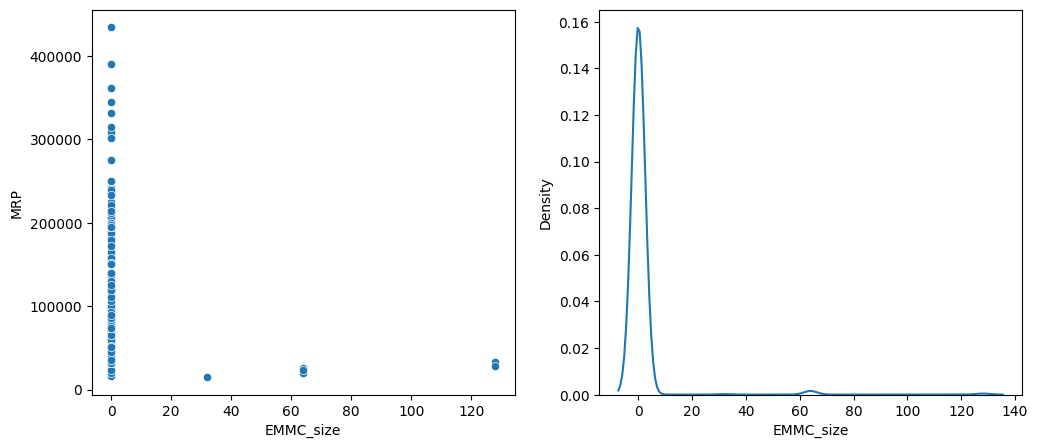

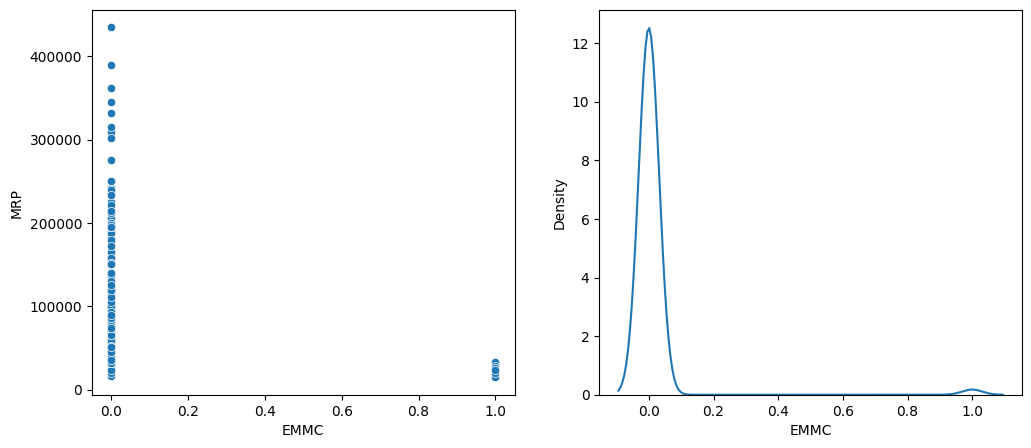

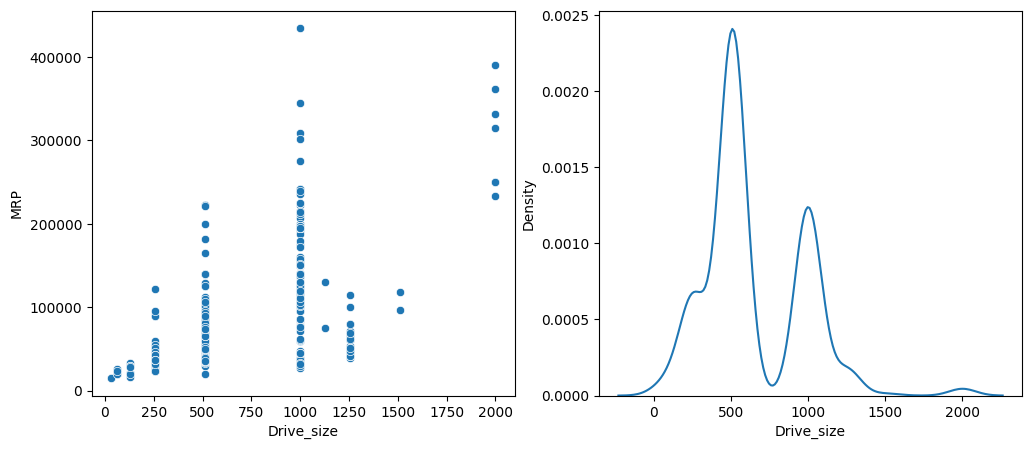

In [39]:
num_cols = data.select_dtypes('number').drop(['MRP'], axis=1).columns
for col in num_cols:
  fig, axes = plt.subplots(1,2, figsize=(12, 5))
  sns.scatterplot(data=data, x=col, y='MRP', ax=axes[0])
  sns.kdeplot(data=data, x=col, ax=axes[1])
  plt.show()

In [40]:
data['Display'].describe()

count    720.000000
mean      15.183000
std        0.891272
min       11.600000
25%       14.175000
50%       15.600000
75%       15.600000
max       17.300000
Name: Display, dtype: float64

<Axes: xlabel='Display', ylabel='Count'>

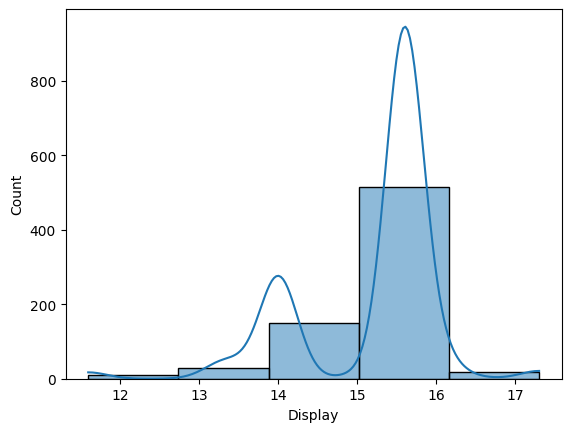

In [41]:
sns.histplot(data['Display'], bins=5, kde=True)

In [42]:
data.columns

Index(['CPU_type', 'CPU_cores', 'OS', 'Display', 'RAM_size', 'RAM_type',
       'HDD_size', 'HDD', 'SSD_size', 'SSD', 'EMMC_size', 'EMMC', 'Drive_size',
       'Drive_type', 'MRP'],
      dtype='object')

In [43]:
new_data = data.drop(['Display', 'HDD_size', 'EMMC_size', 'EMMC', 'Drive_type'], axis=1)
new_data.head()

,CPU_type,CPU_cores,OS,RAM_size,RAM_type,HDD,SSD_size,SSD,Drive_size,MRP
0,Intel,2.0,Windows,8,DDR4,0,256,1,256,36990.0
1,Intel,2.0,Windows,8,DDR4,0,512,1,512,39990.0
2,Intel,2.0,Windows,8,DDR4,0,512,1,512,32990.0
3,AMD,6.0,Windows,8,DDR4,0,512,1,512,49990.0
4,Intel,4.0,Windows,8,DDR4,0,512,1,512,49990.0


In [44]:
new_data.to_csv('laptop.csv', index = False)

In [45]:
X = new_data.drop('MRP', axis=1)
y = new_data['MRP']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)
X_train.shape

(540, 9)

In [47]:
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number').drop(['SSD', 'HDD'], axis=1)
X_train_num[['RAM_size', 'Drive_size', 'SSD_size']] = np.log2(X_train_num[['RAM_size', 'Drive_size', 'SSD_size']]+1)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_sc = pd.DataFrame(scaler.fit_transform(X_train_num),
                              columns = X_train_num.columns,
                              index = X_train_num.index)
X_train_num_sc.head()

,CPU_cores,RAM_size,SSD_size,Drive_size
574,-0.330153,-0.567447,0.160746,-0.146241
9,-0.330153,1.054341,0.160746,-0.146241
679,-0.330153,-0.567447,0.160746,-0.146241
434,-1.183181,-2.066319,-0.368646,-1.369961
15,1.375902,1.054341,0.672737,1.037253


In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
X_train_cat_enc = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_enc.head()

,CPU_type_AMD,CPU_type_Apple,CPU_type_Intel,OS_Chrome,OS_DOS,OS_Mac OS,OS_Windows,RAM_type_DDR4,RAM_type_DDR5,RAM_type_Unified Memory
574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
679,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
434,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
X_train_tr = pd.concat([X_train_num_sc, X_train_cat_enc, X_train.SSD, X_train.HDD], axis=1)
X_train_tr.head()

,CPU_cores,RAM_size,SSD_size,Drive_size,CPU_type_AMD,CPU_type_Apple,CPU_type_Intel,OS_Chrome,OS_DOS,OS_Mac OS,OS_Windows,RAM_type_DDR4,RAM_type_DDR5,RAM_type_Unified Memory,SSD,HDD
574,-0.330153,-0.567447,0.160746,-0.146241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0
9,-0.330153,1.054341,0.160746,-0.146241,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
679,-0.330153,-0.567447,0.160746,-0.146241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
434,-1.183181,-2.066319,-0.368646,-1.369961,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
15,1.375902,1.054341,0.672737,1.037253,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0


In [51]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number').drop(['SSD', 'HDD'], axis=1)
X_test_num[['RAM_size', 'Drive_size', 'SSD_size']] = np.log2(X_test_num[['RAM_size', 'Drive_size', 'SSD_size']]+1)
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num),
                              columns = X_test_num.columns,
                              index = X_test_num.index)
X_test_cat_enc = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_tr = pd.concat([X_test_num_sc, X_test_cat_enc, X_test.SSD, X_test.HDD], axis=1)
X_test_tr.head()

,CPU_cores,RAM_size,SSD_size,Drive_size,CPU_type_AMD,CPU_type_Apple,CPU_type_Intel,OS_Chrome,OS_DOS,OS_Mac OS,OS_Windows,RAM_type_DDR4,RAM_type_DDR5,RAM_type_Unified Memory,SSD,HDD
362,-1.183181,-0.567447,-0.368646,-1.369961,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
182,-1.183181,-0.567447,0.160746,-0.146241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
263,-1.183181,-0.567447,-0.368646,-1.369961,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
68,0.522874,-0.567447,0.672737,1.037253,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0
274,0.522874,1.054341,0.160746,-0.146241,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0


In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_tr, y_train)

LinearRegression()

<Axes: xlabel='MRP', ylabel='Count'>

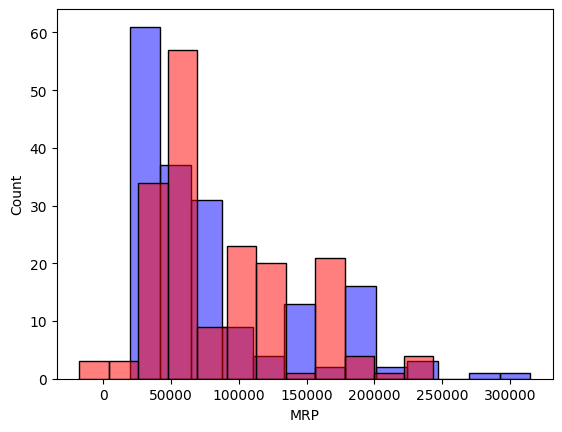

In [53]:
y_test_pr = regressor.predict(X_test_tr)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

In [54]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

Mean Absolute Error:  18275.86111111111
Mean Squared Error:  560529799.95
Root Mean Squared Error:  23675.510553101067
Coefficient of Determination:  0.8445840557032244


Mean Absolute Error:  13781.784444444445
Mean Squared Error:  468498950.4204444
Root Mean Squared Error:  21644.836576431906
Coefficient of Determination:  0.8701010958059026


<Axes: xlabel='MRP', ylabel='Count'>

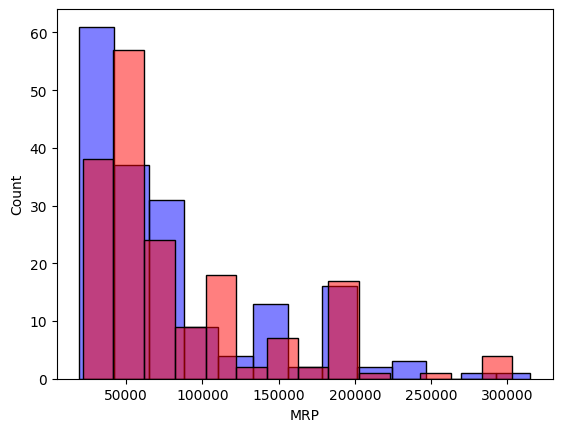

In [55]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()
regressor.fit(X_train_tr, y_train)
y_test_pr = regressor.predict(X_test_tr)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  13408.195269245738
Mean Squared Error:  426263167.2618968
Root Mean Squared Error:  20646.141704006026
Coefficient of Determination:  0.8818116491489809


<Axes: xlabel='MRP', ylabel='Count'>

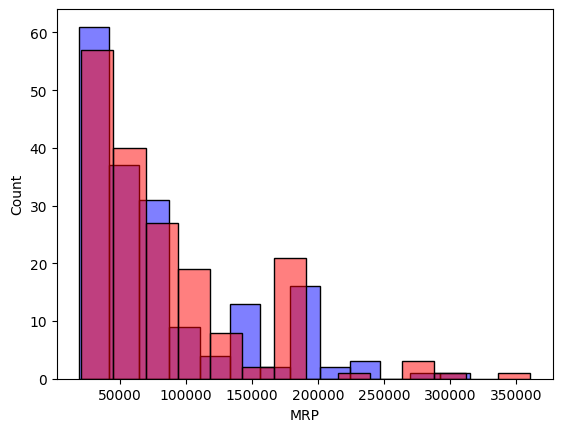

In [56]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train_tr, y_train)
y_test_pr = regressor.predict(X_test_tr)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  13554.592699978817
Mean Squared Error:  415946681.4817706
Root Mean Squared Error:  20394.77093477077
Coefficient of Determination:  0.8846720615293496


<Axes: xlabel='MRP', ylabel='Count'>

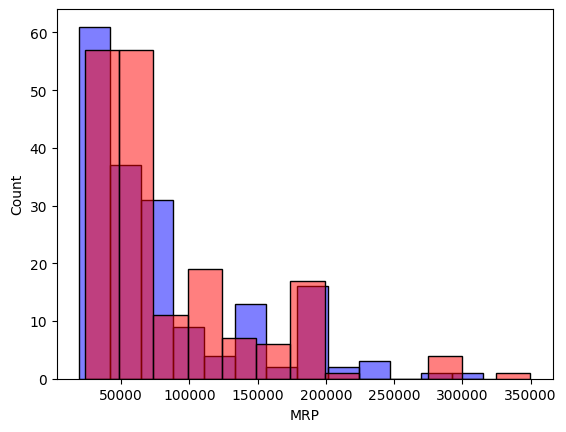

In [57]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train_tr, y_train)
y_test_pr = regressor.predict(X_test_tr)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  14078.977449382062
Mean Squared Error:  404374499.7234851
Root Mean Squared Error:  20109.06511311466
Coefficient of Determination:  0.8878806359096918


<Axes: xlabel='MRP', ylabel='Count'>

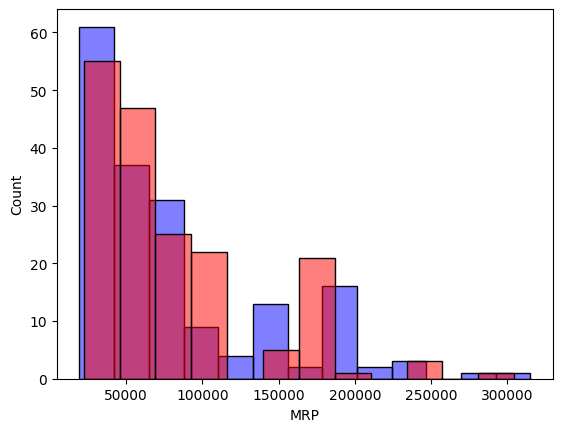

In [58]:
y_train_ln = np.log(y_train)

regressor = LinearRegression()
regressor.fit(X_train_tr, y_train_ln)
y_test_pr = np.exp(regressor.predict(X_test_tr))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  13463.6433382971
Mean Squared Error:  463217064.81065375
Root Mean Squared Error:  21522.47812893891
Coefficient of Determination:  0.871565583937999


<Axes: xlabel='MRP', ylabel='Count'>

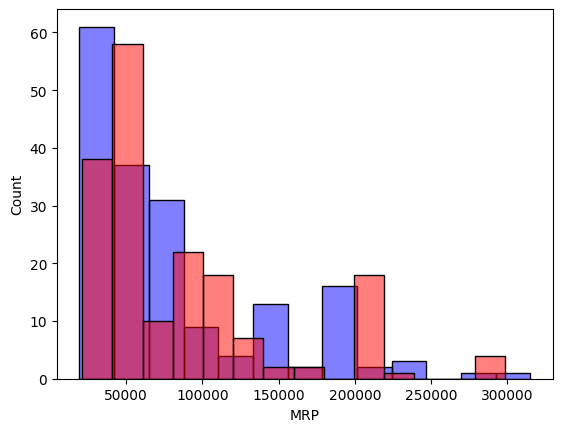

In [59]:
y_train_ln = np.log(y_train)

regressor = KNeighborsRegressor()
regressor.fit(X_train_tr, y_train_ln)
y_test_pr = np.exp(regressor.predict(X_test_tr))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  13209.651007064313
Mean Squared Error:  408314970.07015103
Root Mean Squared Error:  20206.805043602293
Coefficient of Determination:  0.8867880768344113


<Axes: xlabel='MRP', ylabel='Count'>

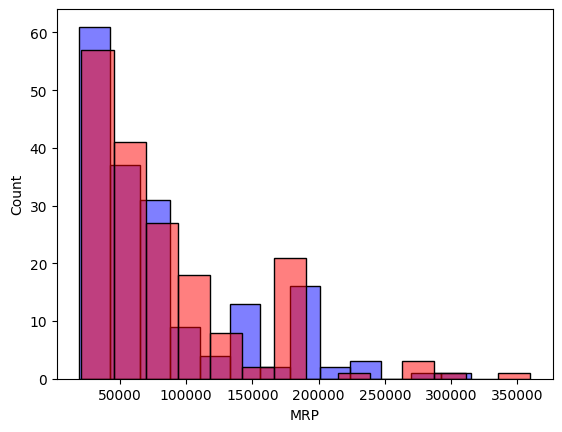

In [60]:
y_train_ln = np.log(y_train)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_tr, y_train_ln)
y_test_pr = np.exp(regressor.predict(X_test_tr))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

Mean Absolute Error:  13214.80407176098
Mean Squared Error:  409593389.0537377
Root Mean Squared Error:  20238.413699046123
Coefficient of Determination:  0.8864336145140159


<Axes: xlabel='MRP', ylabel='Count'>

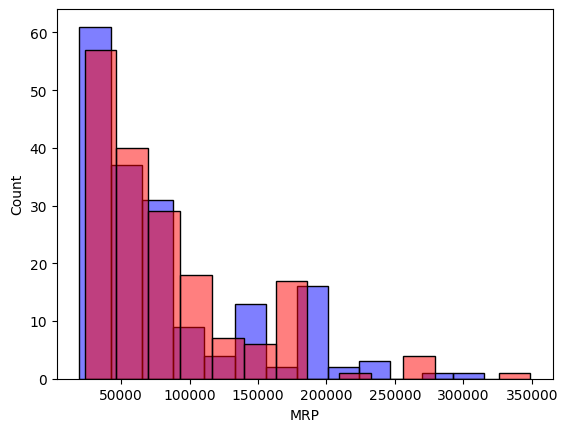

In [61]:
y_train_ln = np.log(y_train)

regressor = RandomForestRegressor()
regressor.fit(X_train_tr, y_train_ln)
y_test_pr = np.exp(regressor.predict(X_test_tr))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pr, color='red', alpha=0.5)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pr})
temp_df.head()

,Actual,Predicted
362,33990.0,32489.151203
182,37490.0,40946.254558
263,29990.0,37594.077703
68,59990.0,80608.525618
274,81990.0,63813.075496


In [63]:
from sklearn.compose import ColumnTransformer

X = new_data.drop('MRP', axis=1)
y = new_data['MRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87)
X_train[['RAM_size', 'Drive_size', 'SSD_size']] = np.log2(X_train[['RAM_size', 'Drive_size', 'SSD_size']]+1)
X_test[['RAM_size', 'Drive_size', 'SSD_size']] = np.log2(X_test[['RAM_size', 'Drive_size', 'SSD_size']]+1)


preprocessor = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['CPU_type', 'OS', 'RAM_type']),
        ('scaler', StandardScaler(), ['CPU_cores', 'RAM_size', 'SSD_size', 'Drive_size'])
    ],
    remainder = 'passthrough'
)

rfr = RandomForestRegressor(random_state=87)
X_train_pr = preprocessor.fit_transform(X_train)
X_test_pr = preprocessor.transform(X_test)

rfr.fit(X_train_pr, np.log(y_train))
y_test_pr = np.exp(rfr.predict(X_test_pr))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pr))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pr))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pr)))
print('Coefficient of Determination: ', metrics.r2_score(y_test, y_test_pr))

Mean Absolute Error:  13349.98692045574
Mean Squared Error:  409360401.31735873
Root Mean Squared Error:  20232.65680323172
Coefficient of Determination:  0.8864982141286343


In [64]:
errors = abs(y_test_pr - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print(f'Accuracy = {accuracy:0.2f}%.')

Model Performance
Accuracy = 84.65%.
